### Tasca M6 T01

Exercicis per practicar amb regressions.

### Guia de l'exercici

#### - Exercici 1
1 Carregar dades  
2 Split de les dades Train/test  
3 Primera exploració gràfica simple: correlació entre els atributs i MEDV  
4 Resultat de les gràfiques  
5 Matriu de correlació  
6 Primeres regressions: RM vs MEDV (model1)  
7 Càlcul del paràmetres de les regressions  
8 Faig un segom model: LSTAT vs MEDV (model2)  
#### - Exercici 2
1 R^2 i MSE  
2 MAE, RMSE i statsmodel  
3 Model de regression amb RM i LSTAT vs MEDV (model3) fent servir statsmodel  
4 Model de regressio lineal amb tots els atributs (model4) i calcul del R^2  
#### - Exercici 3
1 Ajusto el model4 fent servir GridSearchCV. 1er ajusto cv  
2 Ajusto el model4 (regressio lineal)  
3 Random Forest Regression (model5): generat i ajustat fent servir GridSearchCV  
4 Gradient Boosting Regression (model6): generat i ajustat fent servir GridSearchCV  
#### - Exercici 4
1 Calculem les prediccions pels models 5 i 6  
2 Representació gràfica (dispersió) dels models 5 i 6 entrenats i no entrenats  
3 Distribució de la diferencia entre el valors reals i predits, models 5 i 6, entrenats i no entrenats  
4 Creació de la taula Resultats RMSE de tots els models  
5 Calcul RMSE de models 5 i 6, entrenats i no entrenats. **Dades:Train**  
6 Calcul RMSE de models 5 i 6, entrenats i no entrenats. **Dades:Test**  
7 Calcul RMSE de models 5 i 6, entrenats i no entrenats. **Dades:Totes**  
#### - Exercici 5
1 X i y, excloent-hi 'RM', split Train/test  
2 Regressio Random Forest (model7)  
3 Regressio Gradient Boosting (model8)  
4 Calcul de totes les regressions
    * model7 -> Random Forest (entrenat i no entrenat). **Dades:train**  
    * model8 -> Gradient Boosting (entrenat i no entrenat). **Dades:train**  
    * model9 -> Random Forest (entrenat i no entrenat). **Dades:test**  
    * model10 -> Gradient Boosting (entrenat i no entrenat. **Dades:test**  
    * model11 -> Random Forest (entrenat i no entrenat). **Dades:totes**  
    * model12 -> Gradient Boosting (entrenat i no entrenat. **Dades:totes**  
5 Afegim una columna als resultats amb els nous noms i afegim (RM-) per indicar que RM està exclosa  
6 Calculem el RMSE pel models (RM-)  
7 Resultas finals RMSE de tots els models comsiderats  
8 Gràfiques comparatives entre el models amb RM i els (RM-)  

#### - Exercici 1

Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

> 1 Carregar dades

In [1]:
# Carreguem pandas, numpy i la base de dades

import pandas as pd
import numpy as np
housing = pd.read_csv('housing data.csv', 
        names =('CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'))
housing.head(2)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


In [2]:
housing.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

> 2 Split de les dades Train/test

In [3]:
# Fem el split entre Train (80%) i test (20%)
from sklearn.model_selection import train_test_split

housing_train, housing_test = train_test_split(housing, test_size=0.2, random_state=2)

In [4]:
housing_train.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287.0,19.6,396.9,6.87,23.1
37,0.08014,0.0,5.96,0,0.499,5.850,41.5,3.9342,5,279.0,19.2,396.9,8.77,21.0


In [5]:
housing_test.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
463,5.82115,0.0,18.10,0,0.713,6.513,89.9,2.8016,24,666.0,20.2,393.82,10.29,20.2
152,1.12658,0.0,19.58,1,0.871,5.012,88.0,1.6102,5,403.0,14.7,343.28,12.12,15.3


> 3 Primera exploració gràfica simple: correlació entre els atributs i MEDV

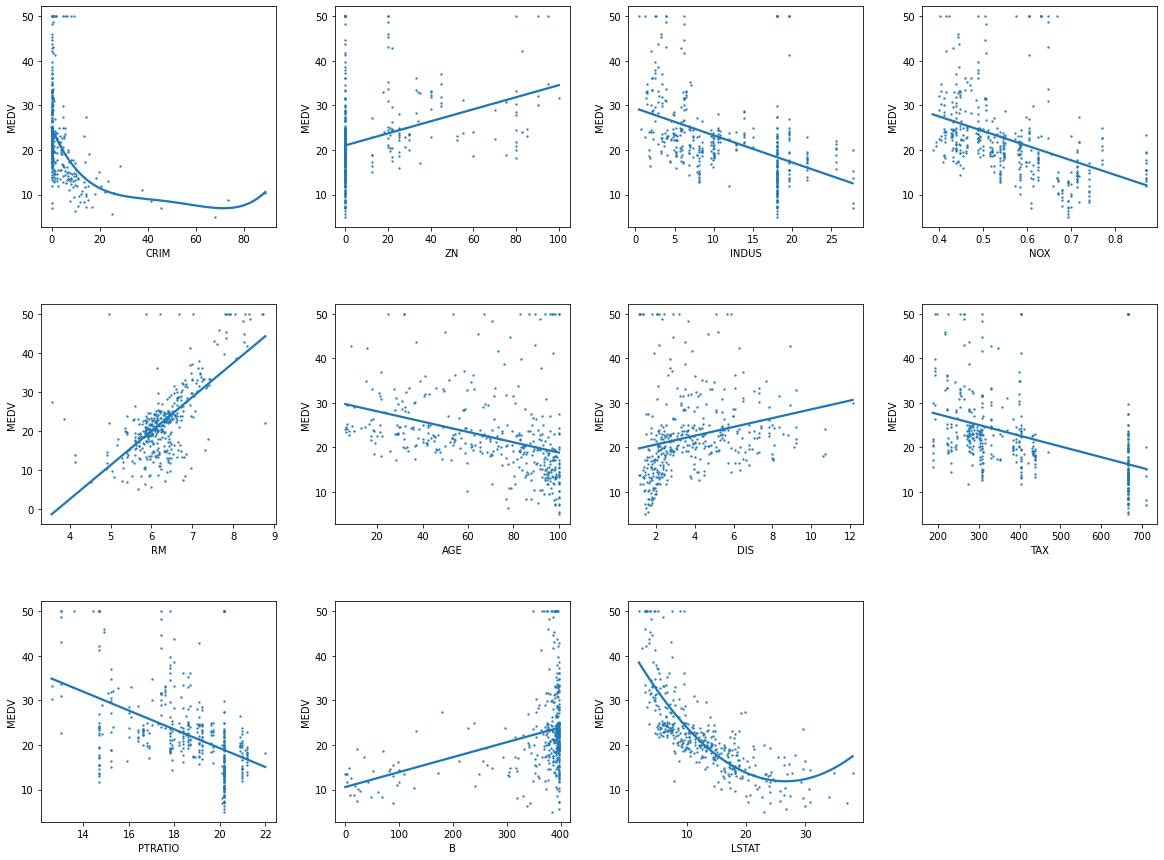

In [6]:
# Fem unes gràfiques per veure la relació entre els diferents atributs i el valor de la vivenda (MEDV)
# He ajustat l'ordre de la regressió per veure quin tipus s'ajusta raonablement a la dispersió de punts.
# He limitat l'ajust al ordre més petit raonable, per tal d'evitar l'overfitting

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=.35)

plt.subplot(3,4,1)
sns.regplot(y = housing_train['MEDV'],x = housing_train['CRIM'], data = housing_train, scatter_kws={'s':2},ci = None, order=4)
plt.subplot(3,4,2)
sns.regplot(y = housing_train['MEDV'],x = housing_train['ZN'], data = housing_train, scatter_kws={'s':2},ci = None, order=1)
plt.subplot(3,4,3)
sns.regplot(y = housing_train['MEDV'],x = housing_train['INDUS'], data = housing_train, scatter_kws={'s':2},ci = None, order=1)
plt.subplot(3,4,4)
sns.regplot(y = housing_train['MEDV'],x = housing_train['NOX'], data = housing_train, scatter_kws={'s':2},ci = None, order=1)
plt.subplot(3,4,5)
sns.regplot(y = housing_train['MEDV'],x = housing_train['RM'], data = housing_train, scatter_kws={'s':2},ci = None, order=1)
plt.subplot(3,4,6)
sns.regplot(y = housing_train['MEDV'],x = housing_train['AGE'], data = housing_train, scatter_kws={'s':2},ci = None, order=1)
plt.subplot(3,4,7)
sns.regplot(y = housing_train['MEDV'],x = housing_train['DIS'], data = housing_train, scatter_kws={'s':2},ci = None, order=1)
plt.subplot(3,4,8)
sns.regplot(y = housing_train['MEDV'],x = housing_train['TAX'], data = housing_train, scatter_kws={'s':2},ci = None, order=1)
plt.subplot(3,4,9)
sns.regplot(y = housing_train['MEDV'],x = housing_train['PTRATIO'], data = housing_train, scatter_kws={'s':2},ci = None, order=1)
plt.subplot(3,4,10)
sns.regplot(y = housing_train['MEDV'],x = housing_train['B'], data = housing_train, scatter_kws={'s':2},ci = None, order=1)
plt.subplot(3,4,11)
sns.regplot(y = housing_train['MEDV'],x = housing_train['LSTAT'], data = housing_train, scatter_kws={'s':2},ci = None, order=2);

> 4 Resultat de les gràfiques

* El nombre d'habitacións (**RM**) es un bon candidat per la regressió lineal
* El percentatge de població en status inferiors (**LSTAT**) sembla un bon candidate per una regressió d'ordre 2
* El crim per capita (**CRIM**) podría ser un bon candidat per una regressió, però 'ordre mínim que sembla raonable es de 4, amb un posible risk de overfitting.

* La resta d'atributs sembla mostrar una correlació molt pobre amb el preu de la vivenda.

> 5 Matriu de correlació

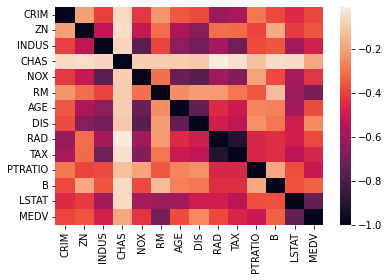

In [7]:
# Faig una matriu de correlació. Per simplificar les dades ho faig en valor absolut 
# i ho multiplico per (-1) per que les millors correlacions surtin mes fosques
sns.heatmap(np.absolute(housing.corr())*(-1));

> 6 primeres regressions: RM vs MEDV (model1) 
#### Dos models de regressió:

Farem un model de regressió lineal fent servir RM

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generem les tres arrays que es faran servir pel models de regressió. L'array y serà la mateixa pels dos.
y_train, X1_train, X2_train = np.array(housing_train['MEDV']), np.array(housing_train['RM']).reshape(-1,1), np.array(housing_train['LSTAT']).reshape(-1,1)

# model 1: regressió lineal MEDV vs RM
model1 = LinearRegression()
model1.fit(X1_train, y_train)

LinearRegression()

> 7 Calcul del paràmetres de les regressions

In [9]:
r_sq1 = model1.score(X1_train, y_train)
print(f"coeficient de determinació: {r_sq1:.3f}")
print(f"ordenada a l'origen (intercept): {model1.intercept_:.3f}")
print(f"pendent: {model1.coef_}")

coeficient de determinació: 0.445
ordenada a l'origen (intercept): -32.552
pendent: [8.74934434]


### De les notes de la web RealPython
#### A complete model, using multiple polynomial regression
* Step 1: Import packages and classes
* Step 2a: Provide data. X is "vertical", while y is "horizontal". You can reshape x using  .reshape(-1,1)
* Step 2b: Transform input data. 
    In scikit-learn, by convention, a trailing underscore (name_) indicates that an attribute is estimated.
* Step 3: Create a model and fit it
* Step 4: Get results
* Step 5: Predict response


> 8 Faig un segom model: LSTAT vs MEDV (model2)

In [10]:
# model 2: regressio polinómica MEDV vs LSTAT

# Hem de crear la variable transformacio2
transf2 = PolynomialFeatures(degree=2, include_bias=False)

# L'ajustem amb .fit()
transf2.fit(X2_train)

# Ara està llesta per crear una variable d'input modificada. Apliquem: .transform() to do that:
X2_train_ = transf2.transform(X2_train)

model2 = LinearRegression().fit(X2_train_, y_train)

In [11]:
r_sq2 = model2.score(X2_train_, y_train)
print(f"coeficient de determinació: {r_sq2:.3f}")
print(f"ordenada a l'origen (intercept): {model2.intercept_:.3f}")
print(f"coeficients: {model2.coef_}")

coeficient de determinació: 0.620
ordenada a l'origen (intercept): 42.802
coeficients: [-2.32454593  0.04365197]


#### - Exercici 2

Compara’ls en base al MSE i al R2.

> 1 R^2 i MSE

In [12]:
# Comparem els models en base a R^2
print(f"coeficient de determinació model 1(RM): {r_sq1:.3f}")
print(f"coeficient de determinació model 2(LSTAT): {r_sq2:.3f}")


coeficient de determinació model 1(RM): 0.445
coeficient de determinació model 2(LSTAT): 0.620


In [13]:
# Per calcular el MSE hem de calcular els valors pronosticats (predicted)

# model 1: regressió lineal fent servir RM
y1_pred = model1.predict(X1_train)

# model 2: regressió polinómica fent servir LSTAT
y2_pred = model2.predict(X2_train_)

In [14]:
# Calculem el MSE
from sklearn.metrics import mean_squared_error
import math
print(f' El MSE pel model 1 es: {mean_squared_error(y_train, y1_pred):.3f}')
print(f' El MSE pel model 2 es: {mean_squared_error(y_train, y2_pred):.3f}')

 El MSE pel model 1 es: 46.957
 El MSE pel model 2 es: 32.106


>2 MAE, RMSE i statsmodel

#### MAE, RMSE i statsmodel
Encara que no es demana a l'exercic ho poso aquí per que a mi em serveix de referència

In [15]:
# Calculem el MAE
from sklearn.metrics import mean_absolute_error

# I els imprimim un a sobre de l'altre
print(f'El MAE pel model 1 es: {mean_absolute_error(y_train, y1_pred):.3f}')
print(f'El MAE pel model 2 es: {mean_absolute_error(y_train, y2_pred):.3f}')

El MAE pel model 1 es: 4.563
El MAE pel model 2 es: 4.130


In [16]:
# Ara mostrem el RMSE

from sklearn.metrics import mean_squared_error
import math

print(f' El RMSE pel model 1 es: {math.sqrt(mean_squared_error(y_train, y1_pred)):.3f}')
print(f' El RMSE pel model 2 es: {math.sqrt(mean_squared_error(y_train, y2_pred)):.3f}')

 El RMSE pel model 1 es: 6.853
 El RMSE pel model 2 es: 5.666


In [17]:
# el mateix fent servir statsmodel pels models 1 i 2
import statsmodels.api as sm

print('Resultats amb statsmodel per la primera regressió (LM)')
X1_train = sm.add_constant(X1_train)

model1b = sm.OLS(y_train, X1_train)
results = model1b.fit()
print(results.summary())
print('--------')
print('Resultats amb statsmodel per la segona regressió (LSTAT)')
X2_train_ = sm.add_constant(X2_train_)

model2b = sm.OLS(y_train, X2_train_)
results = model2b.fit()
print(results.summary())

Resultats amb statsmodel per la primera regressió (LM)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     322.0
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           2.61e-53
Time:                        08:07:29   Log-Likelihood:                -1350.8
No. Observations:                 404   AIC:                             2706.
Df Residuals:                     402   BIC:                             2714.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

>3 model de regression amb RM i LSTAT vs MEDV (model3) fent servir statsmodel

 #### Fem un 3er model combinant les variables RM i LSTAT. Aquest model augmenta moltíssim la R^2

In [18]:
# Agafem les variables RM i LSTAT del train set
X3_train = housing_train[['RM', 'LSTAT']]

# Fem el model
model3 = sm.OLS(y_train, X3_train).fit() # idèntic al de dalt però en una sola línia
predictions = model3.predict(X3_train)
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              3460.
Date:                Fri, 14 Oct 2022   Prob (F-statistic):                   4.62e-254
Time:                        08:07:29   Log-Likelihood:                         -1275.2
No. Observations:                 404   AIC:                                      2554.
Df Residuals:                     402   BIC:                                      2562.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9165      0.082     59.698      0.000       4.755       5.078
LSTAT         -0.6653      0.036    -18.562      0.000      -0.736      -0.595
==============================================================================
Omnibus:                      122.508   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              384.796
Skew:                           1.385   Prob(JB):                     2.77e-84
Kurtosis:                       6.897   Cond. No.                         4.81
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Ara fem un Linear regression amb totes les dades
model 4

>4 model de regressio lineal amb tos els atributs i calcul del R^2

In [19]:
#Definim les 'X' i la 'y'
X4 = housing[['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]

y4 = housing['MEDV']

In [20]:
X4.head(2)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14


In [21]:
from sklearn.model_selection import train_test_split

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression

#Fem el model i el fit
model4 = LinearRegression()
model4.fit(X4_train, y4_train)

LinearRegression()

In [23]:
# Veiem els coeficients per cada variable
coeff_model4 = pd.DataFrame(model4.coef_, X4.columns, columns=['Coef'])
coeff_model4.transpose()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
Coef,-0.142477,0.038457,0.072763,-14.900799,4.146484,-0.009016,-1.418123,0.277012,-0.010257,-0.936738,0.01274,-0.566143


In [24]:
r_sq4 = model4.score(X4_train, y4_train)
print(f'Coeficient de determinació R^2 model 4: {r_sq4:.3f}')

Coeficient de determinació R^2 model 4: 0.737


#### - Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

>1 Ajusto el model 4 fent servir GridSearchCV. 1er ajusto cv

In [25]:
# Ajusto el model 4 fent servir GridSearchCV

from sklearn.model_selection import GridSearchCV

# En una regressió lineal veig que aquest son el paràmetres que es poden ajustar:
parametres4 = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

# Ara faig un bucle per determinar el valor de cv de GridSearch que em dona el coeficient més alt
llista_cv = [2,3,4,5,6,7,8,9,10]
y4_pred = model4.predict(X4_train)

for valor_cv in llista_cv:
    grid4 = GridSearchCV(model4, parametres4, cv=valor_cv)
    grid4.fit(X4_train, y4_train)
    print("cv=",valor_cv,f", R^2={grid4.best_score_:.3f}, MAE={mean_absolute_error(y4_train, y4_pred):.3f}, RMSE={math.sqrt(mean_squared_error(y4_train, y4_pred)):.3f}")

# El millor seria cv = 3

cv= 2 , R^2=0.704, MAE=3.379, RMSE=4.811
cv= 3 , R^2=0.712, MAE=3.379, RMSE=4.811
cv= 4 , R^2=0.708, MAE=3.379, RMSE=4.811
cv= 5 , R^2=0.685, MAE=3.379, RMSE=4.811
cv= 6 , R^2=0.705, MAE=3.379, RMSE=4.811
cv= 7 , R^2=0.710, MAE=3.379, RMSE=4.811
cv= 8 , R^2=0.703, MAE=3.379, RMSE=4.811
cv= 9 , R^2=0.694, MAE=3.379, RMSE=4.811
cv= 10 , R^2=0.687, MAE=3.379, RMSE=4.811


>2 Ajusto el model4 (regressio lineal)

In [26]:
# Fem un grid search amb els tres parametres que permet la regressió lineal i cv = 3

parametres4 = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

grid4 = GridSearchCV(model4, parametres4, cv=3)
grid4.fit(X4_train, y4_train)

print(" Resultat del Grid Search " )
print(f"El millor score de TOTS els parametres analitzats: {grid4.best_score_:.3f}")
print(f"Els millors parametres de tots els analitzats: \n{grid4.best_params_}")

 Resultat del Grid Search 
El millor score de TOTS els parametres analitzats: 0.712
Els millors parametres de tots els analitzats: 
{'copy_X': True, 'fit_intercept': True, 'normalize': True}


#### Resultat pel model 4: Linear regression:
En el cas de la regressió lineal amb tots els atributs, els millors parametres son el que ja venen per defecte

> 3 Forest Regression (model5): generat i ajustat fent servir GridSearchCV

#### Random Forest regression
Fem un 5e model, ara de Random Forest, que dona més joc per evaluar paràmetres

In [27]:
# En aquest model de regressió farem un Random Forest
from sklearn.ensemble import RandomForestRegressor

parametres5 = [{'n_estimators': [50, 100, 150], 
                'max_features': [3, 4, 5, 6],
                'bootstrap': [True, False],
                'criterion':['mse', 'mae'],
                'max_depth':[100,200]}]

model5 = RandomForestRegressor()
model5.fit(X4_train, y4_train)

grid_search5 = GridSearchCV(model5, param_grid = parametres5 , cv=3, scoring='neg_mean_squared_error')
grid_search5.fit(X4_train, y4_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True, False],
                          'criterion': ['mse', 'mae'], 'max_depth': [100, 200],
                          'max_features': [3, 4, 5, 6],
                          'n_estimators': [50, 100, 150]}],
             scoring='neg_mean_squared_error')

In [28]:
print(" Resultat del Grid Search " )
print(f"El millor estimator de entre tots els parametres analitzats:\n {grid_search5.best_estimator_}\n")
print(f"El millor score de TOTS els parametres analitzats: {grid_search5.best_score_:.3f}")
print(f"Els millors parametres de tots els analitzats: \n{grid_search5.best_params_}")

 Resultat del Grid Search 
El millor estimator de entre tots els parametres analitzats:
 RandomForestRegressor(criterion='mae', max_depth=100, max_features=5)

El millor score de TOTS els parametres analitzats: -14.548
Els millors parametres de tots els analitzats: 
{'bootstrap': True, 'criterion': 'mae', 'max_depth': 100, 'max_features': 5, 'n_estimators': 100}


> 4 Gradient Boosting Regression (model6): generat i ajustat fent servir GridSearchCV

#### Gradient Boosting regression
Fem un 6e model, ara de Gradient Boosting Regressor, que també dona bastant joc per evaluar paràmetres

In [29]:
# I finalment farem un model Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

model6 = GradientBoostingRegressor()

parametres6 = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]}

grid_search6 = GridSearchCV(estimator=model6, param_grid = parametres6, cv = 3, n_jobs=-1)
grid_search6.fit(X4_train, y4_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [30]:
print(" Resultat del Grid Search " )
print(f"El millor estimator de entre tots els parametres analitzats:\n {grid_search6.best_estimator_}\n")
print(f"El millor score de TOTS els parametres analitzats: {grid_search6.best_score_:.3f}")
print(f"Els millors parametres de tots els analitzats: \n{grid_search6.best_params_}")

 Resultat del Grid Search 
El millor estimator de entre tots els parametres analitzats:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=1500,
                          subsample=0.5)

El millor score de TOTS els parametres analitzats: 0.841
Els millors parametres de tots els analitzats: 
{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1500, 'subsample': 0.5}


#### - Exercici 4

Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

##### Farem servir els model 5 (RandomForestRegressor) i 6 (GradientBoostingRegressor)

> 1 Calculem les prediccions pels models 5 i 6

In [31]:
# Primer veurem com es comporten les prediccion dels model original i entrenats de manera gràfica
# Calculem totes les prediccions

model5_untrained = RandomForestRegressor()
model5_untrained.fit(X4_train, y4_train)
predictions5_untrained = model5_untrained.predict(X4_train)

model5_trained = RandomForestRegressor(bootstrap = True, criterion = 'mae', max_depth= 200, max_features= 4, n_estimators= 50)
model5_trained.fit(X4_train, y4_train)
predictions5_trained = model5_trained.predict(X4_train)

model6_untrained = GradientBoostingRegressor()
model6_untrained.fit(X4_train, y4_train)
predictions6_untrained = model6_untrained.predict(X4_train)

model6_trained = GradientBoostingRegressor(learning_rate= 0.03, max_depth= 4, n_estimators= 500, subsample= 0.5)
model6_trained.fit(X4_train, y4_train)
predictions6_trained = model6_trained.predict(X4_train)

> 2 Representació gràfica (dispersió) dels models 5 i 6 entrenats i no entrenats

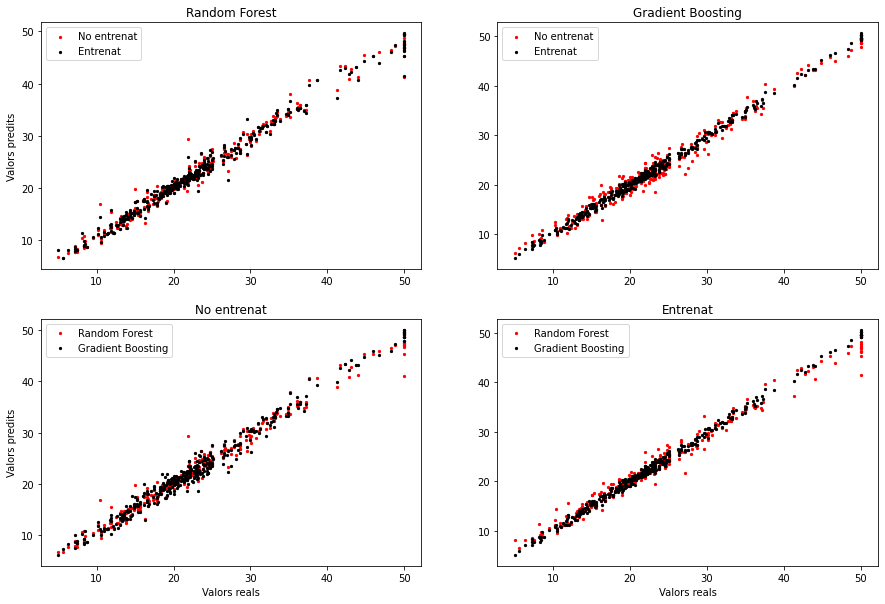

In [32]:
# i les representem gràficament

plt.figure(figsize=(15,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.2)

plt.subplot(2,2,1)
plt.scatter(y4_train, predictions5_untrained, c= 'red', s=5)
plt.scatter(y4_train, predictions5_trained, c= 'black', s=5)
plt.title('Random Forest')
plt.xlabel("")
plt.ylabel("Valors predits")
plt.legend(('No entrenat', 'Entrenat'), loc='upper left', ncol=1, fontsize=10)

plt.subplot(2,2,2)
plt.scatter(y4_train, predictions6_untrained, c= 'red', s=5)
plt.scatter(y4_train, predictions6_trained, c= 'black', s=5)
plt.title('Gradient Boosting')
plt.xlabel("")
plt.ylabel("")
plt.legend(('No entrenat', 'Entrenat'), loc='upper left', ncol=1, fontsize=10)


plt.subplot(2,2,3)
plt.scatter(y4_train, predictions5_untrained, c= 'red', s=5)
plt.scatter(y4_train, predictions6_untrained, c= 'black', s=5)
plt.title('No entrenat')
plt.xlabel("Valors reals")
plt.ylabel("Valors predits")
plt.legend(('Random Forest', 'Gradient Boosting'), loc='upper left', ncol=1, fontsize=10)

plt.subplot(2,2,4)
plt.scatter(y4_train, predictions5_trained, c= 'red', s=5)
plt.scatter(y4_train, predictions6_trained, c= 'black', s=5)
plt.title('Entrenat')
plt.xlabel("Valors reals")
plt.ylabel("")
plt.legend(('Random Forest', 'Gradient Boosting'), loc='upper left', ncol=1, fontsize=10)

plt.show();


### Resultat de les gràfiques

##### Pel Random forest:
A simple vista es veu que els valors del model entrenat s'ajusten millor a la recta, encara que surten alguns valors allunyats
##### Pel Gradient Boosting:
Els valors s'ajusten molt millor a una recta
##### Comparant els models RF i GB (gràfiques de sota)
En tots dos casos el model GB s'ajusta millor a una recta. es molt notori als punts situats mes a la dreta de la gràfica

>3 Distribució de la diferencia entre el valors reals i predits, models 5 i 6, entrenats i no entrenats

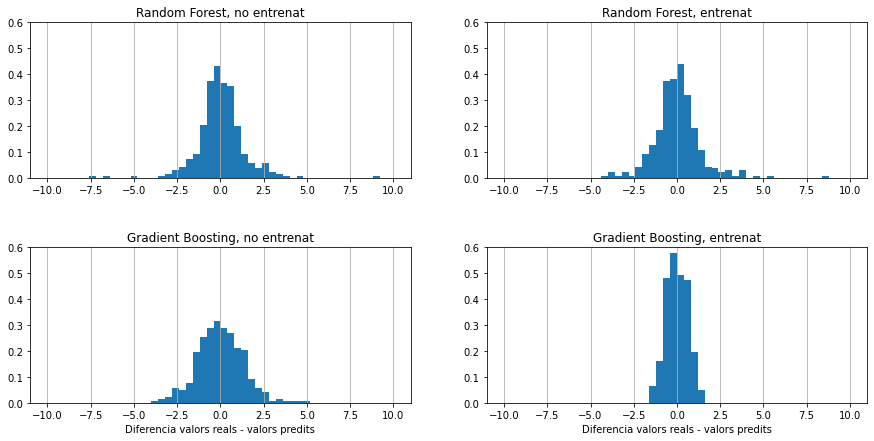

In [33]:
# Veiem la distribució de les diferencies entre el valors reals i els valors predits pel model

plt.figure(figsize=(15,7))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.45)


plt.subplot(2,2,1)
plt.hist((y4_train - predictions5_untrained), bins=50, range=[-10,10], density=True, histtype='bar', align='mid')
plt.ylim((0,0.6))
plt.grid(True, axis = 'x')
plt.title('Random Forest, no entrenat')

plt.subplot(2,2,2)
plt.hist((y4_train - predictions5_trained), bins=50, range=[-10,10], density=True, histtype='bar', align='mid')
plt.ylim((0,0.6))
plt.grid(True, axis = 'x')
plt.title('Random Forest, entrenat')

plt.subplot(2,2,3)
# sns.displot((y4_train - predictions5_untrained),bins=50, kde= True)
plt.hist((y4_train - predictions6_untrained), bins=50, range=[-10,10], density=True, histtype='bar', align='mid')
plt.ylim((0,0.6))
plt.grid(True, axis = 'x')
plt.xlabel("Diferencia valors reals - valors predits")
plt.title('Gradient Boosting, no entrenat')

plt.subplot(2,2,4)
plt.hist((y4_train - predictions6_trained), bins=50, range=[-10,10], density=True, histtype='bar', align='mid')
plt.ylim((0,0.6))
plt.grid(True, axis = 'x')
plt.xlabel("Diferencia valors reals - valors predits")
plt.title('Gradient Boosting, entrenat');

### Resultat dels histogrames

##### Pel Random forest:
No sembla mostrar massa diferencia entre entrenats i no entrenats
##### Pel Gradient Boosting:
Les diferencies entre els valos reals i els valors predits es reduixen molt notablement al model entrenat: podria ser un cas d'overfitting

#### Calculem el RMSE pels dos models (5 i 6), entrenats i no entrenats

> 4 Creació de la taula Resultats RMSE de tots els models

In [34]:
Resultats = pd.DataFrame()
descrip = ['RndFor_UnTr','RndFor_Tr','GrdBoost_UnTr','GrdBoost_Tr']
Resultats['Model'] = descrip

Resultats

,Model
0,RndFor_UnTr
1,RndFor_Tr
2,GrdBoost_UnTr
3,GrdBoost_Tr


> 5 Calcul RMSE de models 5 i 6, entrenats i no entrenats. Dades:Train

In [35]:
# veiem fent servir els valors del set train

valors_X4 =[predictions5_untrained,predictions5_trained,predictions6_untrained,predictions6_trained]
etiquet_X4 =['predictions5_untrained','predictions5_trained','predictions6_untrained','predictions6_trained']
llista_resultat = []
contador = 0

for calc_RMSE in valors_X4:
    rmse_calc = math.sqrt(mean_squared_error(y4_train, calc_RMSE))
    llista_resultat.append(rmse_calc)
    contador += 1
    
Resultats['Dades:Train'] = llista_resultat
Resultats

,Model,Dades:Train
0,RndFor_UnTr,1.355661
1,RndFor_Tr,1.335695
2,GrdBoost_UnTr,1.321153
3,GrdBoost_Tr,0.609427


#### Resultats: 
De nou el model entrenat de Gradient Boosting mostra una disminució molt notable del RMSE

> 6 Calcul RMSE de models 5 i 6, entrenats i no entrenats. **Dades:Test**  

In [36]:
# Ara fem el mateix pel set test
# i calculem totes les prediccions

model5_untrained_test = RandomForestRegressor()
model5_untrained_test.fit(X4_test, y4_test)
predictions5_untrained_test = model5_untrained_test.predict(X4_test)

model5_trained_test = RandomForestRegressor(bootstrap = True, criterion = 'mae', max_depth= 200, max_features= 4, n_estimators= 50)
model5_trained_test.fit(X4_test, y4_test)
predictions5_trained_test = model5_trained_test.predict(X4_test)

model6_untrained_test = GradientBoostingRegressor()
model6_untrained_test.fit(X4_test, y4_test)
predictions6_untrained_test = model6_untrained_test.predict(X4_test)

model6_trained_test = GradientBoostingRegressor(learning_rate= 0.03, max_depth= 4, n_estimators= 500, subsample= 0.5)
model6_trained_test.fit(X4_test, y4_test)
predictions6_trained_test = model6_trained_test.predict(X4_test)

In [37]:
# veiem fent servir els valors del set test

valors_X4_test =[predictions5_untrained_test,predictions5_trained_test,predictions6_untrained_test,predictions6_trained_test]
etiquet_X4_test =['predictions5_untrained_test','predictions5_trained_test','predictions6_untrained_test','predictions6_trained_test']
llista_resultat =[]
contador = 0

for calc_RMSE_test in valors_X4_test:
    rmse_calc_test = math.sqrt(mean_squared_error(y4_test, calc_RMSE_test))
    llista_resultat.append(rmse_calc_test)
    contador += 1
    
Resultats['Dades:Test'] = llista_resultat
Resultats

,Model,Dades:Train,Dades:Test
0,RndFor_UnTr,1.355661,1.471704
1,RndFor_Tr,1.335695,1.430454
2,GrdBoost_UnTr,1.321153,0.629973
3,GrdBoost_Tr,0.609427,0.210626


> 7 Calcul RMSE de models 5 i 6, entrenats i no entrenats. **Dades:Totes**

In [38]:
# Ara fem el mateix per totes les dades
# i calculem totes les prediccions

model5_untrained_all = RandomForestRegressor()
model5_untrained_all.fit(X4, y4)
predictions5_untrained_all = model5_untrained_all.predict(X4)

model5_trained_all = RandomForestRegressor(bootstrap = True, criterion = 'mae', max_depth= 200, max_features= 4, n_estimators= 50)
model5_trained_all.fit(X4, y4)
predictions5_trained_all = model5_trained_all.predict(X4)

model6_untrained_all = GradientBoostingRegressor()
model6_untrained_all.fit(X4, y4)
predictions6_untrained_all = model6_untrained_all.predict(X4)

model6_trained_all = GradientBoostingRegressor(learning_rate= 0.03, max_depth= 4, n_estimators= 500, subsample= 0.5)
model6_trained_all.fit(X4, y4)
predictions6_trained_all = model6_trained_all.predict(X4)

In [39]:
valors_X4_all =[predictions5_untrained_all,predictions5_trained_all,predictions6_untrained_all,predictions6_trained_all]
etiquet_X4_all =['predictions5_untrained_all','predictions5_trained_all','predictions6_untrained_all','predictions6_trained_all']
llista_resultat =[]
contador = 0

for calc_RMSE_all in valors_X4_all:
    rmse_calc_all = math.sqrt(mean_squared_error(y4, calc_RMSE_all))
    llista_resultat.append(rmse_calc_all)
    contador += 1
    
Resultats['Dades:Totes'] = llista_resultat
Resultats   

,Model,Dades:Train,Dades:Test,Dades:Totes
0,RndFor_UnTr,1.355661,1.471704,1.232499
1,RndFor_Tr,1.335695,1.430454,1.195981
2,GrdBoost_UnTr,1.321153,0.629973,1.440862
3,GrdBoost_Tr,0.609427,0.210626,0.744611


#### - Exercici 5

No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

> 1 X i y, excloent-hi 'RM', split Train/test

In [40]:
#Definim les 'X' i la 'y'. En aquest cas hem eliminat l'atribut 'RM'
X7 = housing[['CRIM','ZN','INDUS','NOX','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y7 = housing['MEDV']

from sklearn.model_selection import train_test_split

X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.3, random_state=42)

> 2 Regressio Random forest (model7)

In [41]:
# Farem un Random Forest
from sklearn.ensemble import RandomForestRegressor

parametres7 = [{'n_estimators': [50, 100, 150], 
                'max_features': [3, 4, 5, 6],
                'bootstrap': [True, False],
                'criterion':['mse', 'mae'],
                'max_depth':[100,200]}]

model7 = RandomForestRegressor()
model7.fit(X7_train, y7_train)

grid_search7 = GridSearchCV(model7, param_grid = parametres7 , cv=3, scoring='neg_mean_squared_error')
grid_search7.fit(X7_train, y7_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True, False],
                          'criterion': ['mse', 'mae'], 'max_depth': [100, 200],
                          'max_features': [3, 4, 5, 6],
                          'n_estimators': [50, 100, 150]}],
             scoring='neg_mean_squared_error')

In [42]:
print(" Resultat del Grid Search " )
print(f"El millor estimator de entre tots els parametres analitzats:\n {grid_search7.best_estimator_}\n")
print(f"El millor score de TOTS els parametres analitzats: {grid_search7.best_score_:.3f}")
print(f"Els millors parametres de tots els analitzats: \n{grid_search7.best_params_}")

 Resultat del Grid Search 
El millor estimator de entre tots els parametres analitzats:
 RandomForestRegressor(criterion='mae', max_depth=200, max_features=4,
                      n_estimators=50)

El millor score de TOTS els parametres analitzats: -19.700
Els millors parametres de tots els analitzats: 
{'bootstrap': True, 'criterion': 'mae', 'max_depth': 200, 'max_features': 4, 'n_estimators': 50}


> 3 Regressio Gradient Boosting (model8)

In [43]:
# I finalment farem un model Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

model8 = GradientBoostingRegressor()

parametres8 = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]}

grid_search8 = GridSearchCV(estimator=model8, param_grid = parametres6, cv = 3, n_jobs=-1)
grid_search8.fit(X7_train, y7_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [44]:
print(" Resultat del Grid Search " )
print(f"El millor estimator de entre tots els parametres analitzats:\n {grid_search8.best_estimator_}\n")
print(f"El millor score de TOTS els parametres analitzats: {grid_search8.best_score_:.3f}")
print(f"Els millors parametres de tots els analitzats: \n{grid_search8.best_params_}")

 Resultat del Grid Search 
El millor estimator de entre tots els parametres analitzats:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=1000,
                          subsample=0.1)

El millor score de TOTS els parametres analitzats: 0.790
Els millors parametres de tots els analitzats: 
{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1000, 'subsample': 0.1}


> 4 Calcul de totes les regressions  
    * model7 -> Random forest (entrenat i no entrenat). **Dades:train**  
    * model8 -> Gradient Boosting (entrenat i no entrenat. **Dades:train**  
    * model9 -> Random forest (entrenat i no entrenat). **Dades:test**  
    * model10 -> Gradient Boosting (entrenat i no entrenat. **Dades:test**  
    * model11 -> Random forest (entrenat i no entrenat). **Dades:totes**  
    * model12 -> Gradient Boosting (entrenat i no entrenat. **Dades:totes**  


In [45]:
# Calculem les prediccions segons en nou model

model7_untrained_train = RandomForestRegressor()
model7_untrained_train.fit(X7_train, y7_train)
predictions7_untrained_train = model7_untrained_train.predict(X7_train)

model7_trained_train = RandomForestRegressor(bootstrap = True, criterion = 'mae', max_depth= 200, max_features= 5, n_estimators= 150)
model7_trained_train.fit(X7_train, y7_train)
predictions7_trained_train = model7_trained_train.predict(X7_train)

model8_untrained_train = GradientBoostingRegressor()
model8_untrained_train.fit(X7_train, y7_train)
predictions8_untrained_train = model8_untrained_train.predict(X7_train)

model8_trained_train = GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=500, subsample=0.1)
model8_trained_train.fit(X7_train, y7_train)
predictions8_trained_train = model8_trained_train.predict(X7_train)

model9_untrained_test = RandomForestRegressor()
model9_untrained_test.fit(X7_test, y7_test)
predictions9_untrained_test = model9_untrained_test.predict(X7_test)

model9_trained_test = RandomForestRegressor(bootstrap = True, criterion = 'mae', max_depth= 200, max_features= 5, n_estimators= 150)
model9_trained_test.fit(X7_test, y7_test)
predictions9_trained_test = model9_trained_test.predict(X7_test)

model10_untrained_test = GradientBoostingRegressor()
model10_untrained_test.fit(X7_test, y7_test)
predictions10_untrained_test = model10_untrained_test.predict(X7_test)

model10_trained_test = GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=500, subsample=0.1)
model10_trained_test.fit(X7_test, y7_test)
predictions10_trained_test = model10_trained_test.predict(X7_test)

model11_untrained_all = RandomForestRegressor()
model11_untrained_all.fit(X7, y7)
predictions11_untrained_all = model11_untrained_all.predict(X7)

model11_trained_all = RandomForestRegressor(bootstrap = True, criterion = 'mae', max_depth= 200, max_features= 5, n_estimators= 150)
model11_trained_all.fit(X7, y7)
predictions11_trained_all = model11_trained_all.predict(X7)

model12_untrained_all = GradientBoostingRegressor()
model12_untrained_all.fit(X7, y7)
predictions12_untrained_all = model12_untrained_all.predict(X7)

model12_trained_all = GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=500, subsample=0.1)
model12_trained_all.fit(X7, y7)
predictions12_trained_all = model12_trained_all.predict(X7)


> 5 Afegim una columna als resultats amb els nous noms i afegim (RM-) per indicar que RM està exclosa

In [46]:
descrip2 = ['RndFor_UnTr(RM-)','RndFor_Tr(RM-)','GrdBoost_UnTr(RM-)','GrdBoost_Tr(RM-)']
Resultats['Model(RM-)'] = descrip

Resultats

,Model,Dades:Train,Dades:Test,Dades:Totes,Model(RM-)
0,RndFor_UnTr,1.355661,1.471704,1.232499,RndFor_UnTr
1,RndFor_Tr,1.335695,1.430454,1.195981,RndFor_Tr
2,GrdBoost_UnTr,1.321153,0.629973,1.440862,GrdBoost_UnTr
3,GrdBoost_Tr,0.609427,0.210626,0.744611,GrdBoost_Tr


> 6 Calculem el RMSE pel models (RM-)

In [47]:
valors_X7 =[predictions7_untrained_train,predictions7_trained_train,predictions8_untrained_train,predictions8_trained_train]
etiquet_X7 =['predictions7_untrained_train','predictions7_trained_train','predictions8_untrained_train','predictions8_trained_train']
llista_resultat =[]
contador = 0

for calc_RMSE in valors_X7:
    rmse_calc = math.sqrt(mean_squared_error(y7_train, calc_RMSE))
    llista_resultat.append(rmse_calc)
    contador += 1
    
Resultats['Dades:Train(RM-)'] = llista_resultat
Resultats  

,Model,Dades:Train,Dades:Test,Dades:Totes,Model(RM-),Dades:Train(RM-)
0,RndFor_UnTr,1.355661,1.471704,1.232499,RndFor_UnTr,1.538075
1,RndFor_Tr,1.335695,1.430454,1.195981,RndFor_Tr,1.520227
2,GrdBoost_UnTr,1.321153,0.629973,1.440862,GrdBoost_UnTr,1.730610
3,GrdBoost_Tr,0.609427,0.210626,0.744611,GrdBoost_Tr,2.780373


In [48]:
valors_X7 =[predictions9_untrained_test,predictions9_trained_test,predictions10_untrained_test,predictions10_trained_test]
etiquet_X7 =['predictions9_untrained_test','predictions9_trained_test','predictions10_untrained_test','predictions10_trained_test']
llista_resultat =[]
contador = 0

for calc_RMSE in valors_X7:
    rmse_calc = math.sqrt(mean_squared_error(y7_test, calc_RMSE))
    llista_resultat.append(rmse_calc)
    contador += 1
    
Resultats['Dades:Test(RM-)'] = llista_resultat
Resultats  

,Model,Dades:Train,Dades:Test,Dades:Totes,Model(RM-),Dades:Train(RM-),Dades:Test(RM-)
0,RndFor_UnTr,1.355661,1.471704,1.232499,RndFor_UnTr,1.538075,1.537848
1,RndFor_Tr,1.335695,1.430454,1.195981,RndFor_Tr,1.520227,1.656359
2,GrdBoost_UnTr,1.321153,0.629973,1.440862,GrdBoost_UnTr,1.730610,0.805181
3,GrdBoost_Tr,0.609427,0.210626,0.744611,GrdBoost_Tr,2.780373,3.404226


In [49]:
valors_X7 =[predictions11_untrained_all,predictions11_trained_all,predictions12_untrained_all,predictions12_trained_all]
etiquet_X7 =['predictions11_untrained_all','predictions11_trained_all','predictions12_untrained_all','predictions12_trained_all']
llista_resultat =[]
contador = 0

for calc_RMSE in valors_X7:
    rmse_calc = math.sqrt(mean_squared_error(y7, calc_RMSE))
    llista_resultat.append(rmse_calc)
    contador += 1
    
Resultats['Dades:Totes(RM-)'] = llista_resultat


> 7 Resultas finals RMSE de tots els models comsiderats

In [50]:
Resultats

,Model,Dades:Train,Dades:Test,Dades:Totes,Model(RM-),Dades:Train(RM-),Dades:Test(RM-),Dades:Totes(RM-)
0,RndFor_UnTr,1.355661,1.471704,1.232499,RndFor_UnTr,1.538075,1.537848,1.388806
1,RndFor_Tr,1.335695,1.430454,1.195981,RndFor_Tr,1.520227,1.656359,1.363161
2,GrdBoost_UnTr,1.321153,0.629973,1.440862,GrdBoost_UnTr,1.730610,0.805181,1.918653
3,GrdBoost_Tr,0.609427,0.210626,0.744611,GrdBoost_Tr,2.780373,3.404226,2.756963


> 8 Gràfiques comparatives entre el models amb RM i els (RM-)

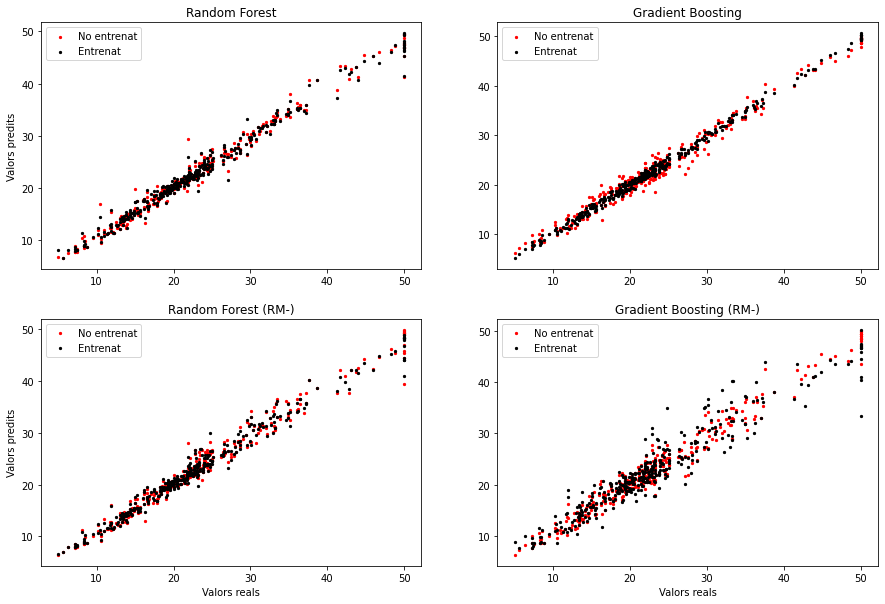

In [51]:
# i les representem gràficament

plt.figure(figsize=(15,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.2)

plt.subplot(2,2,1)
plt.scatter(y4_train, predictions5_untrained, c= 'red', s=5)
plt.scatter(y4_train, predictions5_trained, c= 'black', s=5)
plt.title('Random Forest')
plt.xlabel("")
plt.ylabel("Valors predits")
plt.legend(('No entrenat', 'Entrenat'), loc='upper left', ncol=1, fontsize=10)

plt.subplot(2,2,2)
plt.scatter(y4_train, predictions6_untrained, c= 'red', s=5)
plt.scatter(y4_train, predictions6_trained, c= 'black', s=5)
plt.title('Gradient Boosting')
plt.xlabel("")
plt.ylabel("")
plt.legend(('No entrenat', 'Entrenat'), loc='upper left', ncol=1, fontsize=10)


plt.subplot(2,2,3)
plt.scatter(y7_train, predictions7_untrained_train, c= 'red', s=5)
plt.scatter(y7_train, predictions7_trained_train, c= 'black', s=5)
plt.title('Random Forest (RM-)')
plt.xlabel("Valors reals")
plt.ylabel("Valors predits")
plt.legend(('No entrenat', 'Entrenat'), loc='upper left', ncol=1, fontsize=10)

plt.subplot(2,2,4)
plt.scatter(y7_train, predictions8_untrained_train, c= 'red', s=5)
plt.scatter(y7_train, predictions8_trained_train, c= 'black', s=5)
plt.title('Gradient Boosting (RM-)')
plt.xlabel("Valors reals")
plt.ylabel("")
plt.legend(('No entrenat', 'Entrenat'), loc='upper left', ncol=1, fontsize=10)

plt.show();
